## Question 5

### Inbuilt Function 

[-1.60392186e-07  1.00000601e+01 -3.14922155e-03 -1.66610619e+02
 -2.95947744e-01  8.30456535e+02  5.52239064e+01 -2.39204410e+03
  1.80111064e+03 -2.50883139e+03  1.05301091e+04 -1.68740571e+04
  1.27872872e+04 -4.80045016e+03  7.27561042e+02]


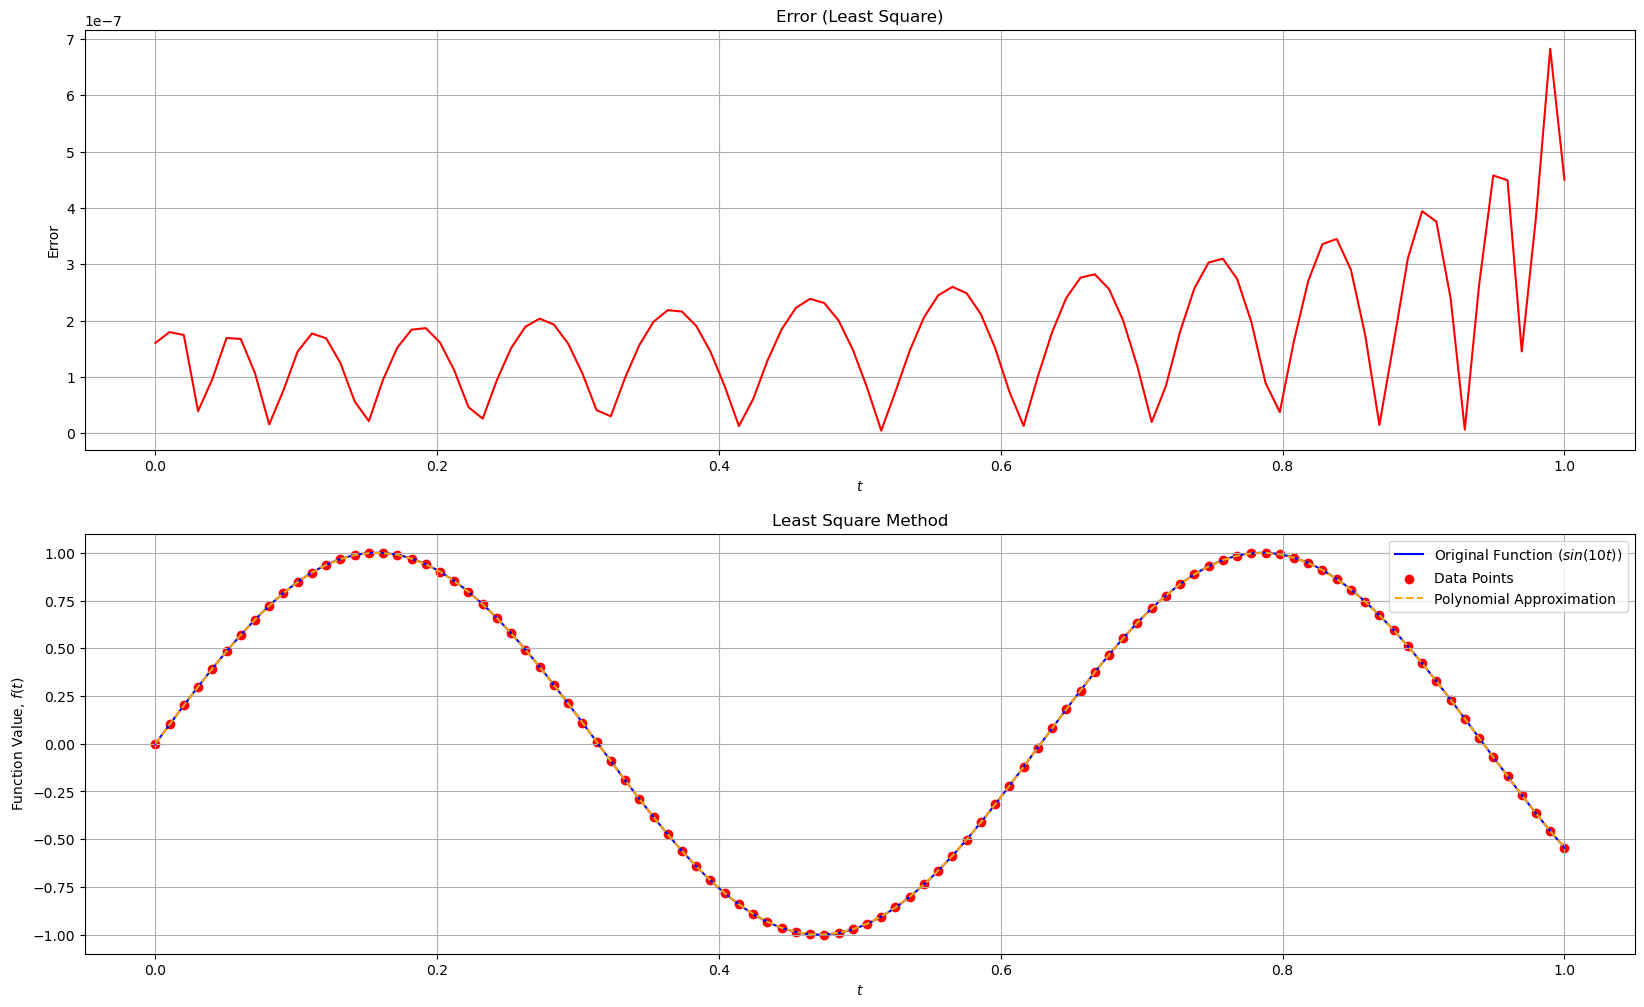

In [13]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 100)
f = np.sin(10 * t)

A = np.zeros((100, 15))
for i in range(100):
    A[i][:] = [t[i]**j for j in range(15)]
b = f

x = np.linalg.lstsq(A, b, rcond=None)[0]
print(x)

approx_true = np.dot(A, x)
error_true = np.abs(f - approx_true)

tn = np.linspace(0, 1, 1000)
fn = np.sin(10 * tn)

figure, axes = plt.subplots(2, 1, figsize=(20, 12))
axes[0].plot(t, error_true, color='red')
axes[0].set_title('Error (Least Square)')
axes[0].set_xlabel(r'$t$')
axes[0].set_ylabel('Error')
axes[0].grid()
axes[1].plot(tn, fn, label=r'Original Function $(sin(10t))$', color='blue')
axes[1].scatter(t, f, color='red', label='Data Points')
axes[1].plot(t, approx_true, label='Polynomial Approximation', color='orange', linestyle='--')
axes[1].set_title('Least Square Method')
axes[1].set_xlabel(r'$t$')
axes[1].set_ylabel(r'Function Value, $f(t)$')
axes[1].legend()
axes[1].grid()
plt.savefig('true.png')
plt.show()

### Modified Gram Schmidt Method

22717773709.14235


[-1.42283001e-02  1.13608004e+01 -2.47062551e+01 -2.33401875e+01
 -4.25729653e+01 -1.93819803e+03  1.28069913e+04 -2.99906592e+04
  3.41890125e+04 -1.95247236e+04  4.61410272e+03 -6.46724598e+01
 -9.59697634e+00 -2.56725416e+00 -9.27243592e-01]


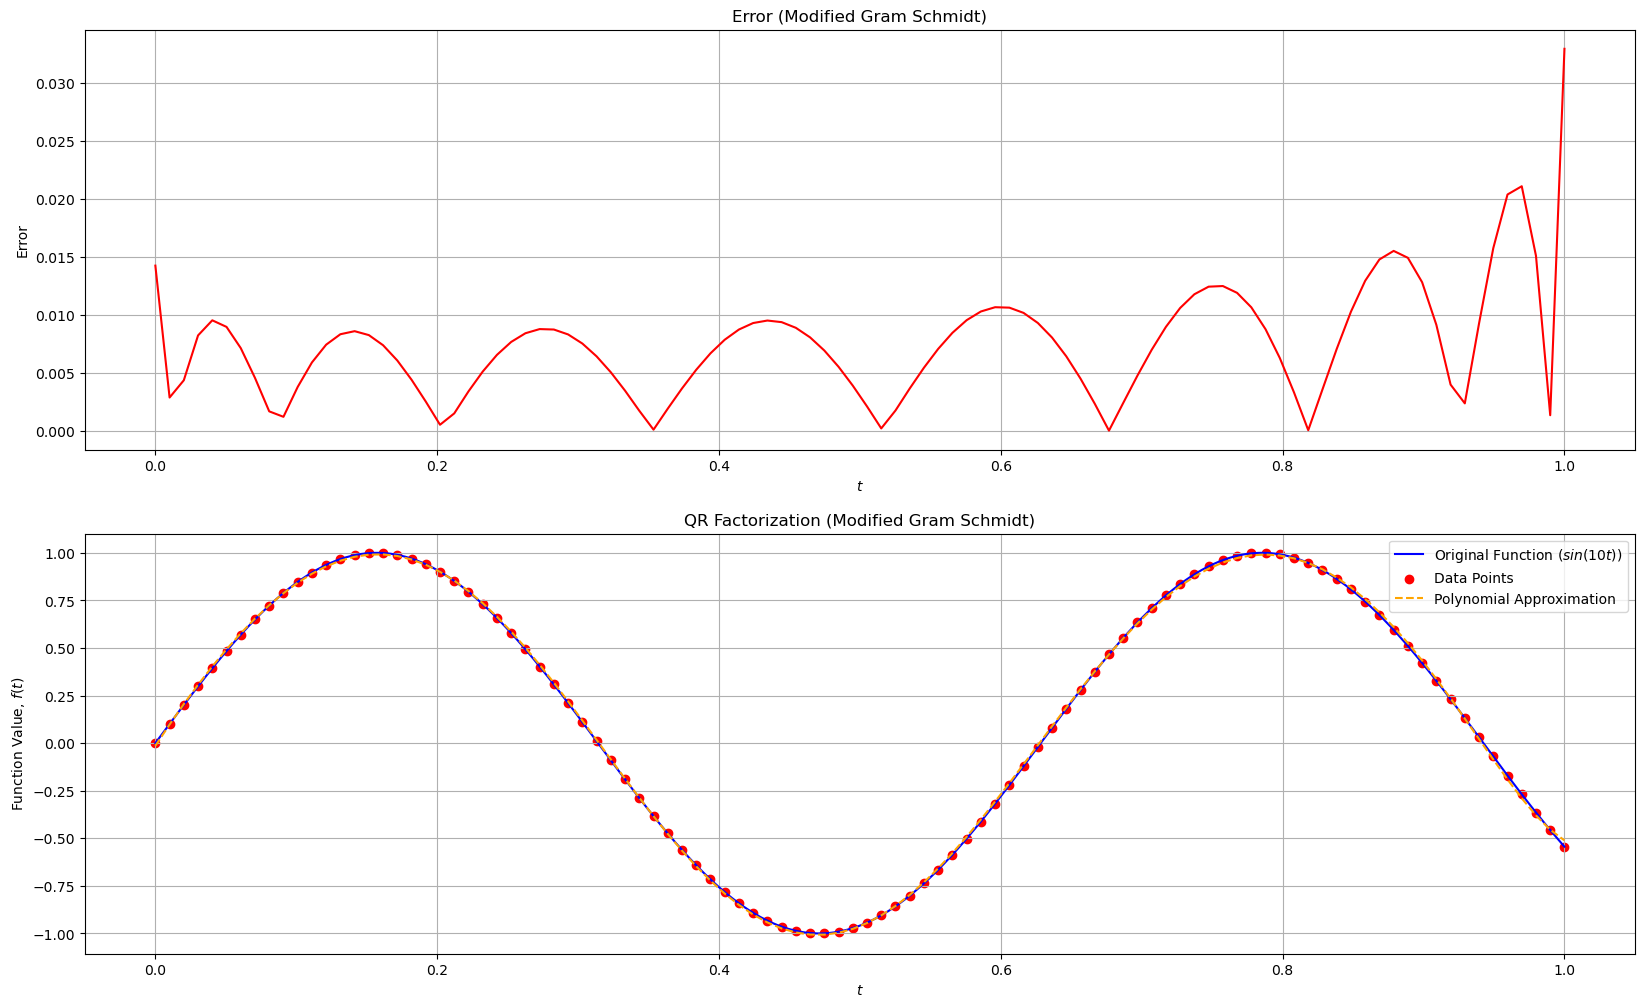

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def modified_gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - (R[i, j] * Q[:, i])
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    return Q, R

def back_substitution(R, y):
    n = R.shape[0]
    x = np.zeros(n)    
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]
    return x

t = np.linspace(0, 1, 100)
f = np.sin(10 * t)
A = np.zeros((100, 15))
for i in range(100):
    A[i][:] = [t[i]**j for j in range(15)]
b = f

condition = np.linalg.cond(A)
print(condition)
print('\n')

Q, R = modified_gram_schmidt(A)

y = np.dot(Q.T, b)
x = back_substitution(R, y)
print(x)

approx_mgs = np.dot(A, x)
error_mgs = np.abs(f - approx_mgs)

tn = np.linspace(0, 1, 1000)
fn = np.sin(10 * tn)

figure, axes = plt.subplots(2, 1, figsize=(20, 12))
axes[0].plot(t, error_mgs, color='red')
axes[0].set_title('Error (Modified Gram Schmidt)')
axes[0].set_xlabel(r'$t$')
axes[0].set_ylabel('Error')
axes[0].grid()
axes[1].plot(tn, fn, label=r'Original Function $(sin(10t))$', color='blue')
axes[1].scatter(t, f, color='red', label='Data Points')
axes[1].plot(t, approx_mgs, label='Polynomial Approximation', color='orange', linestyle='--')
axes[1].set_title('QR Factorization (Modified Gram Schmidt)')
axes[1].set_xlabel(r'$t$')
axes[1].set_ylabel(r'Function Value, $f(t)$')
axes[1].legend()
axes[1].grid()
# plt.savefig('mgs.png')
plt.show()


### Householder Factorization Method 

[-1.60393128e-07  1.00000601e+01 -3.14923126e-03 -1.66610619e+02
 -2.95950666e-01  8.30456559e+02  5.52237759e+01 -2.39204362e+03
  1.80110943e+03 -2.50882922e+03  1.05301064e+04 -1.68740548e+04
  1.27872859e+04 -4.80044973e+03  7.27560979e+02]


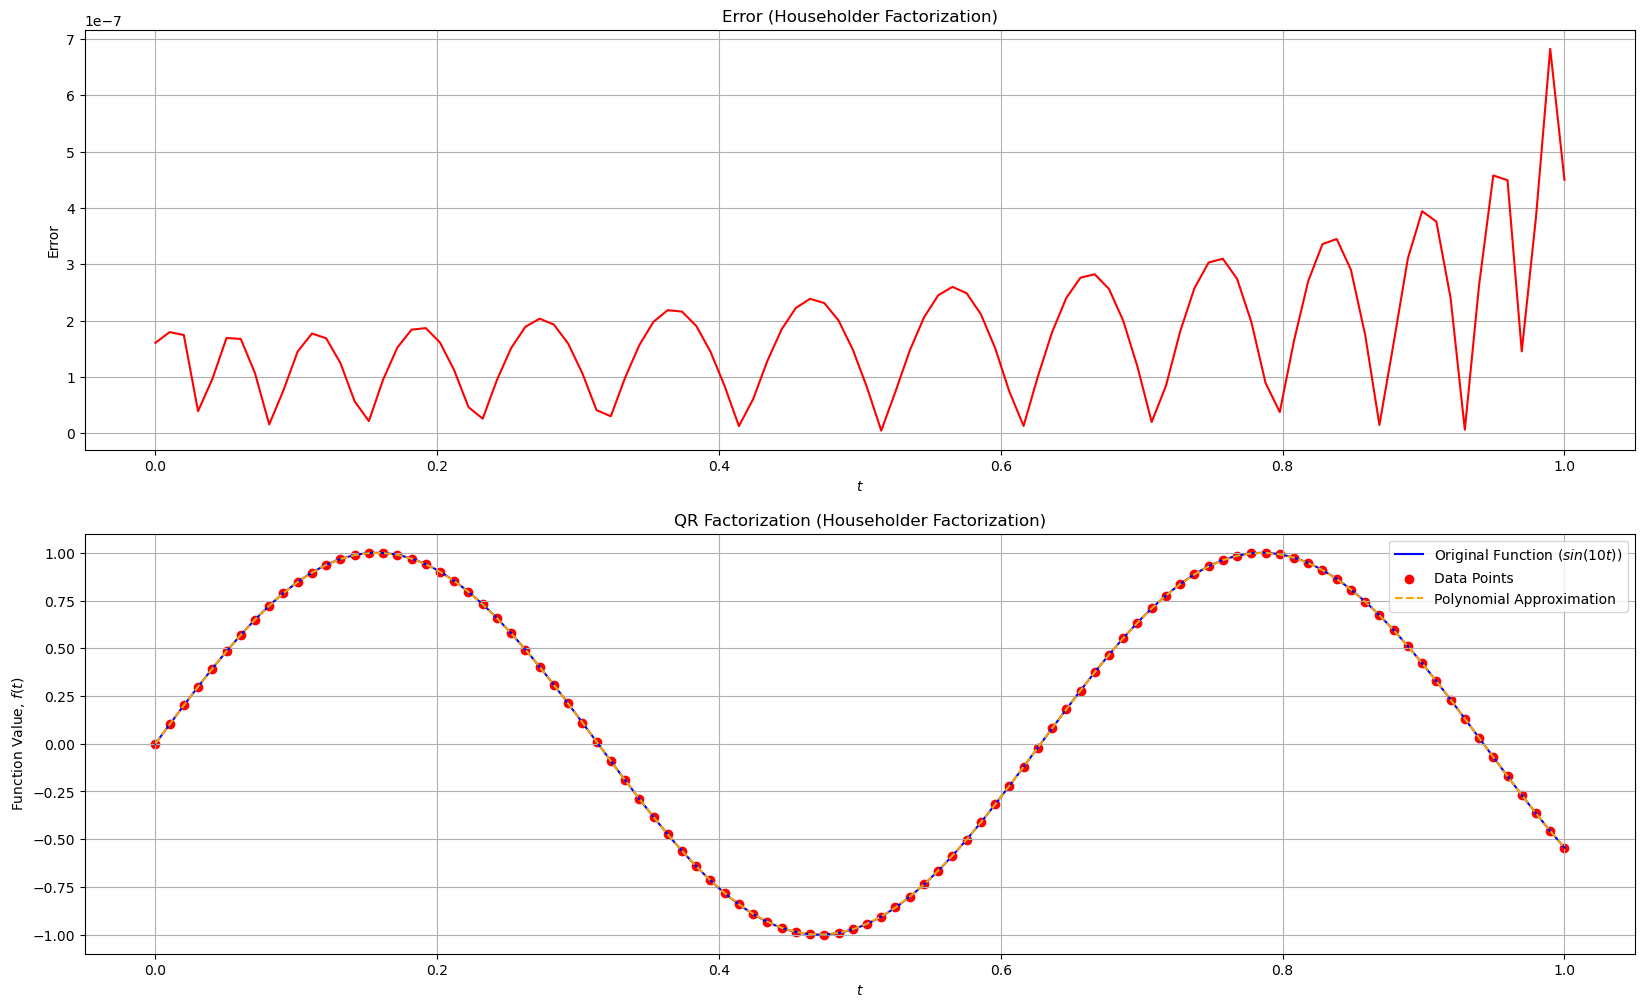

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def householder_reflection(a):
    norm_a = np.linalg.norm(a)
    sign = -1 if a[0] < 0 else 1
    u = a.copy()
    u[0] = u[0] + (sign * norm_a)
    u /= np.linalg.norm(u)
    return u

def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    for k in range(n):
        a = R[k:, k]
        u = householder_reflection(a)
        H = np.eye(m)
        H[k:, k:] = H[k:, k:] - 2 * np.outer(u, u)
        R = H @ R
        Q = Q @ H
    return Q, R

def back_substitution(R, y):
    n = R.shape[0]
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]
    return x

t = np.linspace(0, 1, 100)
f = np.sin(10 * t)
A = np.zeros((100, 15))
for i in range(100):
    A[i][:] = [t[i]**j for j in range(15)]
b = f

Q, R = qr_householder(A)
y = np.dot(Q.T, b)
x = back_substitution(R[:15, :15], y[:15])

print(x)

approx_hh = np.dot(A, x)
error_hh = np.abs(f - approx_hh)

tn = np.linspace(0, 1, 1000)
fn = np.sin(10 * tn)

figure, axes = plt.subplots(2, 1, figsize=(20, 12))
axes[0].plot(t, error_hh, color='red')
axes[0].set_title('Error (Householder Factorization)')
axes[0].set_xlabel(r'$t$')
axes[0].set_ylabel('Error')
axes[0].grid()
axes[1].plot(tn, fn, label=r'Original Function $(sin(10t))$', color='blue')
axes[1].scatter(t, f, color='red', label='Data Points')
axes[1].plot(t, approx_hh, label='Polynomial Approximation', color='orange', linestyle='--')
axes[1].set_title('QR Factorization (Householder Factorization)')
axes[1].set_xlabel(r'$t$')
axes[1].set_ylabel(r'Function Value, $f(t)$')
axes[1].legend()
axes[1].grid()
plt.savefig('hh.png')
plt.show()


### Singular Value Decomposition

[-1.60392185e-07  1.00000601e+01 -3.14922155e-03 -1.66610619e+02
 -2.95947744e-01  8.30456535e+02  5.52239064e+01 -2.39204410e+03
  1.80111064e+03 -2.50883139e+03  1.05301091e+04 -1.68740571e+04
  1.27872872e+04 -4.80045016e+03  7.27561042e+02]


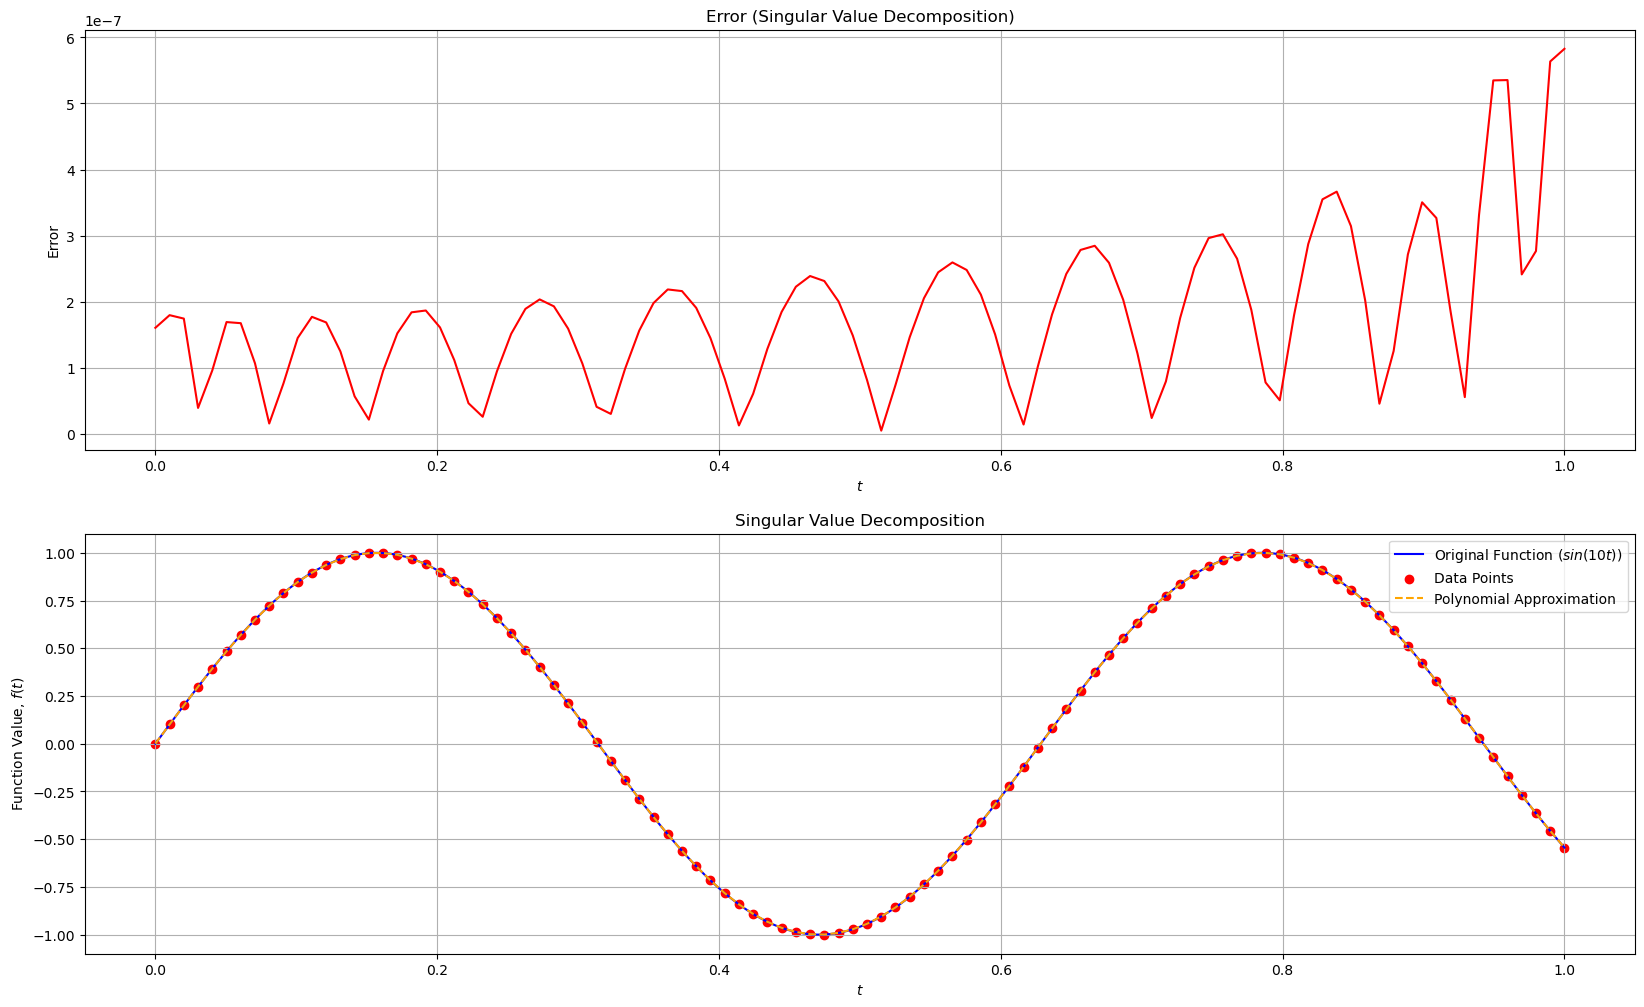

In [23]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 100)
f = np.sin(10 * t)

A = np.zeros((100, 15))
for i in range(100):
    A[i][:] = [t[i]**j for j in range(15)]
b = f

U, S, VT = np.linalg.svd(A, full_matrices=False)
S_inv = np.diag(1 / S)
coefficients = VT.T @ S_inv @ U.T @ b

print(coefficients)

approx_svd = np.dot(A, coefficients)
error_svd = np.abs(f - approx_svd)

tn = np.linspace(0, 1, 1000)
fn = np.sin(10 * tn)

figure, axes = plt.subplots(2, 1, figsize=(20, 12))
axes[0].plot(t, error_svd, color='red')
axes[0].set_title('Error (Singular Value Decomposition)')
axes[0].set_xlabel(r'$t$')
axes[0].set_ylabel('Error')
axes[0].grid()
axes[1].plot(tn, fn, label=r'Original Function $(sin(10t))$', color='blue')
axes[1].scatter(t, f, color='red', label='Data Points')
axes[1].plot(t, approx_svd, label='Polynomial Approximation', color='orange', linestyle='--')
axes[1].set_title('Singular Value Decomposition')
axes[1].set_xlabel(r'$t$')
axes[1].set_ylabel(r'Function Value, $f(t)$')
axes[1].legend()
axes[1].grid()
plt.savefig('svd.png')
plt.show()


### Normal Equations

K(ATA):  1.1020061528999347e+18


[ 1.30304601e-02  9.47562800e+00  5.65889028e+00 -1.87651373e+02
  3.26042175e+01  8.78808960e+02 -5.17557373e+02  2.94912109e+01
 -4.83898633e+03  1.01295703e+04 -6.24203125e+03 -1.68275000e+03
  3.84820312e+03 -1.72356641e+03  2.57527344e+02]


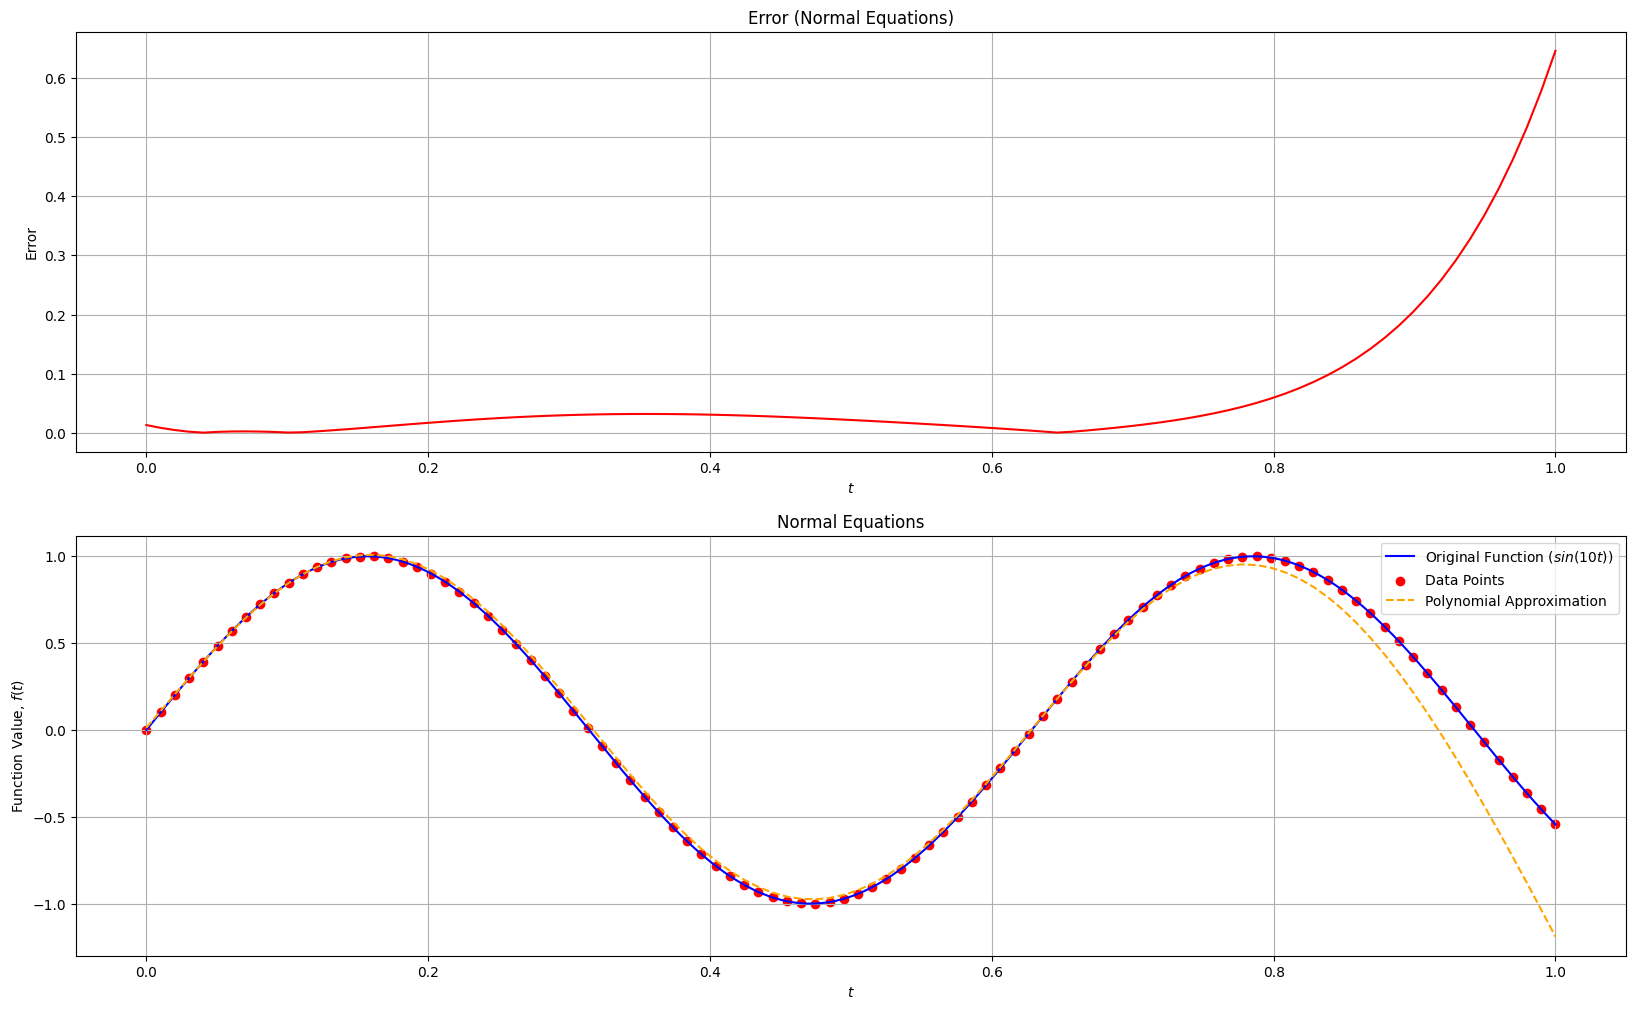

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 100)
f = np.sin(10 * t)

A = np.zeros((100, 15))
for i in range(100):
    A[i][:] = [t[i]**j for j in range(15)]
b = f

ATA = A.T @ A
ATb = A.T @ b

condition = np.linalg.cond(ATA)
print('K(ATA): ',condition)
print('\n')

ATAinv = np.linalg.inv(ATA)
coefficients = ATAinv@ATb

print(coefficients)

approx_n = np.dot(A, coefficients)
error_n = np.abs(f - approx_n)

tn = np.linspace(0, 1, 1000)
fn = np.sin(10 * tn)

figure, axes = plt.subplots(2, 1, figsize=(20, 12))
axes[0].plot(t, error_n, color='red')
axes[0].set_title('Error (Normal Equations)')
axes[0].set_xlabel(r'$t$')
axes[0].set_ylabel('Error')
axes[0].grid()
axes[1].plot(tn, fn, label=r'Original Function $(sin(10t))$', color='blue')
axes[1].scatter(t, f, color='red', label='Data Points')
axes[1].plot(t, approx_n, label='Polynomial Approximation', color='orange', linestyle='--')
axes[1].set_title('Normal Equations')
axes[1].set_xlabel(r'$t$')
axes[1].set_ylabel(r'Function Value, $f(t)$')
axes[1].legend()
axes[1].grid()
plt.savefig('normal.png')
plt.show()
